In [1]:
#Data Part
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

#get the data from the website...start date choose 2016.8.12
bitcoin_market_info = pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20160812&end=" + 
                                  time.strftime("%Y%m%d"))[0]
#convert the data string to the correct data format
bitcoin_market_info = bitcoin_market_info.assign(Date = pd.to_datetime(bitcoin_market_info['Date']))
# When Volume is equal to '-' convert it to 0
#bitcoin_market_info.loc[bitcoin_market_info['Volume'] == '-','Volume'] = 0

# convert to int
bitcoin_market_info['Volume'] = bitcoin_market_info['Volume'].astype('int64')


In [2]:
bitcoin_market_info.columns =[bitcoin_market_info.columns[0]]+['bt_'+i for i in bitcoin_market_info.columns[1:]]

In [3]:
bitcoin_market_info.head()

,Date,bt_Open,bt_High,bt_Low,bt_Close,bt_Volume,bt_Market Cap
0,2018-04-29,9346.41,9531.49,9193.71,9419.08,8853000000,158928000000
1,2018-04-28,8939.27,9412.09,8931.99,9348.48,7805480000,151991000000
2,2018-04-27,9290.63,9375.47,8987.05,8987.05,7566290000,157948000000
3,2018-04-26,8867.32,9281.51,8727.09,9281.51,8970560000,150736000000
4,2018-04-25,9701.03,9745.32,8799.84,8845.74,11083100000,164893000000


In [4]:
#get the bitcoin logo
import sys
from PIL import Image
import io

if sys.version_info[0] < 3:
    import urllib2 as urllib
    bt_img = urllib.urlopen("http://logok.org/wp-content/uploads/2016/10/Bitcoin-Logo-640x480.png")
    #eth_img = urllib.urlopen("https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Ethereum_logo_2014.svg/256px-Ethereum_logo_2014.svg.png")
else:
    import urllib
    bt_img = urllib.request.urlopen("http://logok.org/wp-content/uploads/2016/10/Bitcoin-Logo-640x480.png")
    #eth_img = urllib.request.urlopen("https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Ethereum_logo_2014.svg/256px-Ethereum_logo_2014.svg.png")

image_file = io.BytesIO(bt_img.read())
bitcoin_im = Image.open(image_file)
width_bt_im , height_bt_im  = bitcoin_im.size
bitcoin_im = bitcoin_im.resize((int(bitcoin_im.size[0]*0.4), int(bitcoin_im.size[1]*0.35)), Image.ANTIALIAS)
#image_file = io.BytesIO(eth_img.read())
#eth_im = Image.open(image_file)
#width_eth_im , height_eth_im  = eth_im.size
#eth_im = eth_im.resize((int(eth_im.size[0]*0.8), int(eth_im.size[1]*0.8)), Image.ANTIALIAS)

In [5]:
bitcoin_market_info['Date'][0]

Timestamp('2018-04-29 00:00:00')

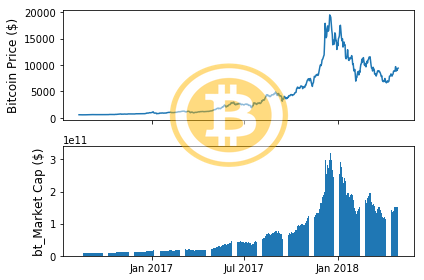

In [6]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[1, 1]})
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax2.set_ylabel('bt_Market Cap ($)',fontsize=12)
#ax2.set_yticks([int('%d000000000'% i) for i in range(20)])
#ax2.set_yticklabels(range(20))
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,7]])
ax1.plot(bitcoin_market_info['Date'].astype(datetime.datetime),bitcoin_market_info['bt_Close'])
ax2.bar(bitcoin_market_info['Date'].astype(datetime.datetime).values, bitcoin_market_info['bt_Market Cap'].values)

fig.tight_layout()
fig.figimage(bitcoin_im, 100, 80, zorder=3,alpha=.5)
plt.show()
fig.savefig("HistoricalData.png")

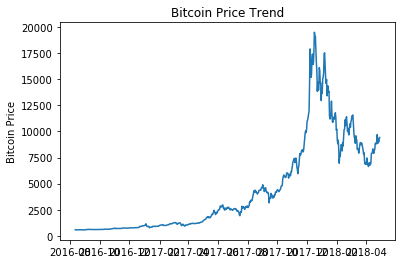

In [7]:
# Historical Data
fig, ax1 = plt.subplots(1,1)
ax1.set_title('Bitcoin Price Trend')
ax1.set_ylabel('Bitcoin Price')
plt.plot(bitcoin_market_info['Date'], bitcoin_market_info['bt_Close'])
plt.show()
fig.savefig("/Users/pz/Desktop/HistoricalDataPrice.png")

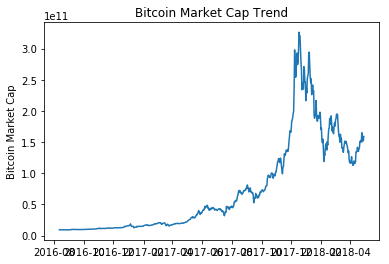

In [8]:
fig, ax1 = plt.subplots(1,1)
ax1.set_title('Bitcoin Market Cap Trend')
ax1.set_ylabel('Bitcoin Market Cap')
plt.plot(bitcoin_market_info['Date'], bitcoin_market_info['bt_Market Cap'])
plt.show()
fig.savefig("/Users/pz/Desktop/HistoricalData.png")

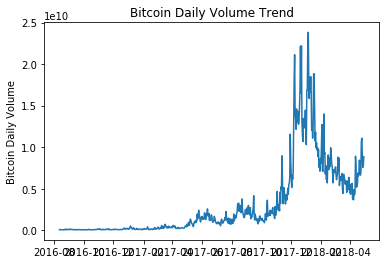

In [9]:
fig, ax1 = plt.subplots(1,1)
ax1.set_title('Bitcoin Daily Volume Trend')
ax1.set_ylabel('Bitcoin Daily Volume')
plt.plot(bitcoin_market_info['Date'], bitcoin_market_info['bt_Volume'])
fig.savefig("/Users/pz/Desktop/DailyVolume.png")
plt.show()

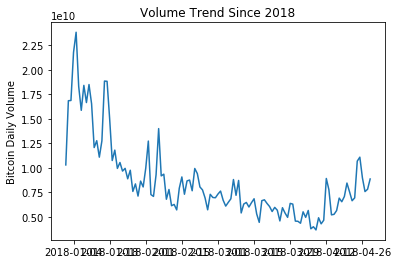

In [10]:
fig, ax1 = plt.subplots(1,1)
ax1.set_title('Volume Trend Since 2018')
ax1.set_ylabel('Bitcoin Daily Volume')
bitcoin_market = bitcoin_market_info
bitcoin_market = bitcoin_market[bitcoin_market_info['Date'] >= '2018-01-01']
bitcoin_market.head()
plt.plot(bitcoin_market['Date'], bitcoin_market['bt_Volume'])
fig.savefig("/Users/pz/Desktop/DailyVolume2.png")
plt.show()

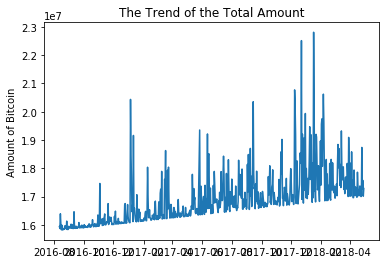

In [11]:
fig, ax1 = plt.subplots(1,1)
ax1.set_title('The Trend of the Total Amount')
ax1.set_ylabel('Amount of Bitcoin')
for coins in ['bt_']:
    bitcoin_market_info['bt_Amount'] = bitcoin_market_info['bt_Market Cap']/bitcoin_market_info['bt_Low']
plt.plot(bitcoin_market_info['Date'], bitcoin_market_info['bt_Amount'])
plt.show()
fig.savefig("/Users/pz/Desktop/BitcoinAmount.png")

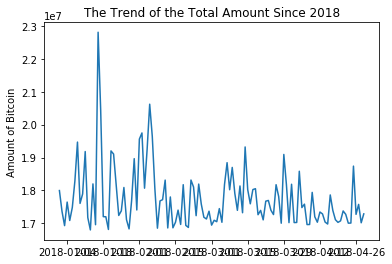

In [12]:
Recent = bitcoin_market_info
Recent = Recent[bitcoin_market_info['Date'] >= '2018-01-01']
fig, ax1 = plt.subplots(1,1)
ax1.set_title('The Trend of the Total Amount Since 2018')
ax1.set_ylabel('Amount of Bitcoin')
plt.plot(Recent['Date'], Recent['bt_Amount'])
plt.show()
fig.savefig("/Users/pz/Desktop/BitcoinAmountRecent.png")

In [13]:
bitcoin_market_info['bt_Amount'].max()

22807187.907679331

In [14]:
#Recent['bt_Amount'].max()

In [15]:
Recent['bt_Amount'].mean()

17756685.835995816

In [16]:
market_info = bitcoin_market_info
market_info = market_info[market_info['Date']>='2016-08-12']
for coins in ['bt_']: 
    kwargs = { coins+'day_diff': lambda x: (x[coins+'Close']-x[coins+'Open'])/x[coins+'Open']}
    market_info = market_info.assign(**kwargs)
market_info.head()

,Date,bt_Open,bt_High,bt_Low,bt_Close,bt_Volume,bt_Market Cap,bt_Amount,bt_day_diff
0,2018-04-29,9346.41,9531.49,9193.71,9419.08,8853000000,158928000000,1.728660e+07,0.007775
1,2018-04-28,8939.27,9412.09,8931.99,9348.48,7805480000,151991000000,1.701648e+07,0.045777
2,2018-04-27,9290.63,9375.47,8987.05,8987.05,7566290000,157948000000,1.757507e+07,-0.032676
3,2018-04-26,8867.32,9281.51,8727.09,9281.51,8970560000,150736000000,1.727219e+07,0.046710
4,2018-04-25,9701.03,9745.32,8799.84,8845.74,11083100000,164893000000,1.873818e+07,-0.088165


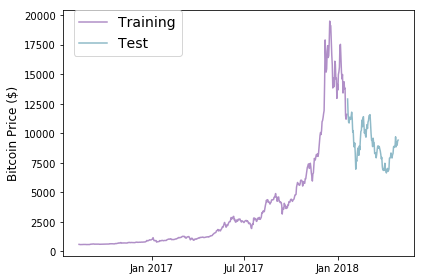

In [17]:
#Random Walk Test and Train
split_date = '2018-01-20'
fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(i,j,1) for i in range(2016,2019) for j in [1,7]])
ax1.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2016,2019) for j in [1,7]])
ax1.plot(market_info[market_info['Date'] < split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date'] < split_date]['bt_Close'], 
         color='#B08FC7', label='Training')
ax1.plot(market_info[market_info['Date'] >= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date'] >= split_date]['bt_Close'], 
         color='#8FBAC8', label='Test')
#ax1.set_xticklabels('')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
plt.tight_layout()
ax1.legend(bbox_to_anchor=(0.03, 1), loc=2, borderaxespad=0., prop={'size': 14})
#fig.figimage(bitcoin_im.resize((int(bitcoin_im.size[0]*0.3), int(bitcoin_im.size[1]*0.125)), Image.ANTIALIAS), 200, 260, zorder=3,alpha=.5)
plt.show()


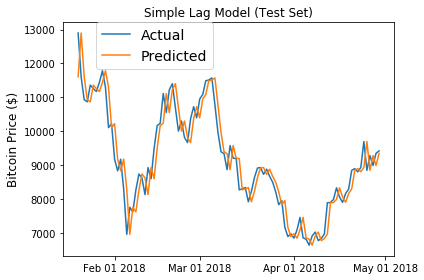

In [18]:
# trivial lag model: P_t = P_(t-1)
fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(2018,i+1,1) for i in range(12)])
ax1.set_xticklabels([datetime.date(2018,i+1,1).strftime('%b %d %Y')  for i in range(12)])
#ax2.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
#ax2.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date']>= split_date]['bt_Close'].values, label='Actual')
ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
          market_info[market_info['Date']>= datetime.datetime.strptime(split_date, '%Y-%m-%d') - 
                      datetime.timedelta(days=1)]['bt_Close'][1:].values, label='Predicted')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
ax1.set_title('Simple Lag Model (Test Set)')
#ax2.set_ylabel('Etherum Price ($)',fontsize=12)
#ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
#         market_info[market_info['Date']>= split_date]['eth_Close'].values, label='Actual')
#ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
#          market_info[market_info['Date']>= datetime.datetime.strptime(split_date, '%Y-%m-%d') - 
#                     datetime.timedelta(days=1)]['eth_Close'][1:].values, label='Predicted')
fig.tight_layout()
fig.savefig('/Users/pz/Desktop/RWsimplelag.png')
plt.show()

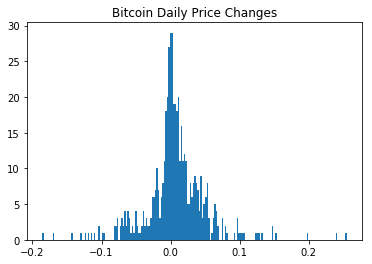

In [19]:
fig, ax1 = plt.subplots(1,1)
ax1.hist(market_info[market_info['Date']< split_date]['bt_day_diff'].values, bins=200)
#ax2.hist(market_info[market_info['Date']< split_date]['eth_day_diff'].values, bins=100)
ax1.set_title('Bitcoin Daily Price Changes')
#ax2.set_title('Ethereum Daily Price Changes')
plt.show()


In [20]:
np.random.seed(202)
bt_r_walk_mean = np.mean(market_info[market_info['Date'] < split_date]['bt_day_diff'])
bt_r_walk_sd = np.std(market_info[market_info['Date'] < split_date]['bt_day_diff'].values)
bt_random_steps = np.random.normal(bt_r_walk_mean, bt_r_walk_sd, 
                                   (max(market_info['Date']).to_pydatetime() - 
                                    datetime.datetime.strptime(split_date, '%Y-%m-%d')).days + 1)

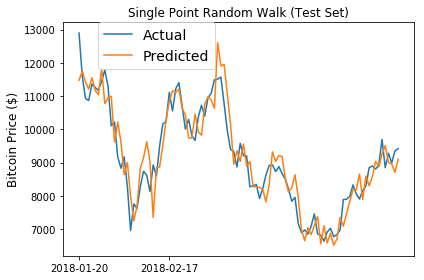

In [21]:
fig, ax1 = plt.subplots(1,1)
#ax1.set_xticks([datetime.date(2018, i + 1, 20) for i in range(3)])
ax1.set_xticks([datetime.date(2018, 1, 20), datetime.date(2018, 2, 17)])
#ax1.set_xticklabels([datetime.date(2018, i+1, 20) for i in range(3)])
ax1.set_xticklabels([datetime.date(2018, 1, 20), datetime.date(2018, 2, 17)])
#ax2.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
#ax2.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
     market_info[market_info['Date']>= split_date]['bt_Close'].values, label='Actual')
ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
      market_info[(market_info['Date']+ datetime.timedelta(days=1))>= split_date]['bt_Close'].values[1:] * 
     (1+bt_random_steps), label='Predicted')
'''ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
     market_info[market_info['Date']>= split_date]['eth_Close'].values, label='Actual')
ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
      market_info[(market_info['Date']+ datetime.timedelta(days=1))>= split_date]['eth_Close'].values[1:] * 
     (1+eth_random_steps), label='Predicted')
'''
ax1.set_title('Single Point Random Walk (Test Set)')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
#ax2.set_ylabel('Ethereum Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.tight_layout()
plt.show()
fig.savefig('Single Point Random Walk (Test Set)')


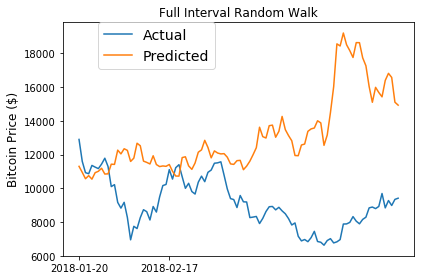

In [23]:
bt_random_walk = []
for n_step, bt_step in enumerate(bt_random_steps):
    if n_step==0:
        bt_random_walk.append(market_info[market_info['Date']< split_date]['bt_Close'].values[0] * (bt_step+1))
        #eth_random_walk.append(market_info[market_info['Date']< split_date]['eth_Close'].values[0] * (eth_step+1))
    else:
        bt_random_walk.append(bt_random_walk[n_step-1] * (bt_step+1))
        #eth_random_walk.append(eth_random_walk[n_step-1] * (eth_step+1))
fig, ax1 = plt.subplots(1, 1)

ax1.set_xticks([datetime.date(2018, 1, 20), datetime.date(2018, 2, 17)])
ax1.set_xticklabels([datetime.date(2018, 1, 20), datetime.date(2018, 2, 17)])
ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date']>= split_date]['bt_Close'].values, label='Actual')
ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         bt_random_walk[::-1], label='Predicted')
ax1.set_title('Full Interval Random Walk')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.tight_layout()
plt.show()
fig.savefig('Full Interval Random Walk')

In [24]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def plot_func(freq):
    np.random.seed(freq)
    random_steps = np.random.normal(bt_r_walk_mean, bt_r_walk_sd, 
                (max(market_info['Date']).to_pydatetime() - datetime.datetime.strptime(split_date, '%Y-%m-%d')).days + 1)
    random_walk = []
    for n_step,i in enumerate(random_steps):
        if n_step==0:
            random_walk.append(market_info[market_info['Date']< split_date]['bt_Close'].values[0] * (i+1))
        else:
            random_walk.append(random_walk[n_step-1] * (i+1))
    fig, (ax1, ax2) = plt.subplots(2,1)
    ax1.set_xticks([datetime.date(2018, 1, 20), datetime.date(2018, 2, 17)])
    ax1.set_xticklabels('')
    ax2.set_xticks([datetime.date(2018, 1, 20), datetime.date(2018, 2, 17)])
    ax2.set_xticklabels([datetime.date(2018, 1, 20), datetime.date(2018, 2, 17)])
    ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date']>= split_date]['bt_Close'].values, label='Actual')
    ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
          market_info[(market_info['Date']+ datetime.timedelta(days=1))>= split_date]['bt_Close'].values[1:] * 
         (1+random_steps), label='Predicted')
    ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
          market_info[(market_info['Date']+ datetime.timedelta(days=1))>= split_date]['bt_Close'].values[1:] * 
         (1+random_steps))
    ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
             random_walk[::-1])
    ax1.set_title('Single Point Random Walk')
    ax1.set_ylabel('')
    # for static figures, you may wish to insert the random seed value
#    ax1.annotate('Random Seed: %d'%freq, xy=(0.75, 0.2),  xycoords='axes fraction',
#            xytext=(0.75, 0.2), textcoords='axes fraction')
    ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
    ax2.set_title('Full Interval Random Walk')
    fig.text(0.0, 0.5, 'Bitcoin Price ($)', va='center', rotation='vertical',fontsize=12)
    plt.tight_layout()
#    plt.savefig('image%d.png'%freq, bbox_inches='tight')
    plt.show()
    
interact(plot_func, freq =widgets.IntSlider(min=100,max=210,step=1,value=205, description='Random Seed:'))

<function __main__.plot_func>

## Long Short Term Memory(LTSM)

In [43]:
for coins in ['bt_']: 
    kwargs = { coins+'close_off_high': lambda x: 2*(x[coins+'High']- x[coins+'Close'])/(x[coins+'High']-x[coins+'Low'])-1,
            coins+'volatility': lambda x: (x[coins+'High']- x[coins+'Low'])/(x[coins+'Open'])}
    market_info = market_info.assign(**kwargs)

In [44]:
market_info.head()

,Date,bt_Open,bt_High,bt_Low,bt_Close,bt_Volume,bt_Market Cap,bt_Amount,bt_day_diff,bt_close_off_high,bt_volatility
0,2018-04-07,6630.51,7050.54,6630.51,6911.09,3976610000,112467000000,1.696204e+07,0.042317,-0.336000,0.063348
1,2018-04-06,6815.96,6857.49,6575.00,6636.32,3766810000,115601000000,1.758190e+07,-0.026356,0.565861,0.041445
2,2018-04-05,6848.65,6933.82,6644.80,6811.47,5639320000,116142000000,1.747863e+07,-0.005429,-0.153346,0.042201
3,2018-04-04,7456.41,7469.88,6803.88,6853.84,4936000000,126434000000,1.858263e+07,-0.080812,0.849970,0.089319
4,2018-04-03,7102.26,7530.94,7072.49,7456.11,5499700000,120415000000,1.702583e+07,0.049822,-0.673552,0.064550


In [45]:
model_data = market_info[['Date']+[coin+metric for coin in ['bt_'] 
                                   for metric in ['Close','Volume','close_off_high','volatility']]]
# need to reverse the data frame so that subsequent rows represent later timepoints
model_data = model_data.sort_values(by='Date')
model_data.head()

,Date,bt_Close,bt_Volume,bt_close_off_high,bt_volatility
603,2016-08-12,587.56,69218000,-0.229508,0.010360
602,2016-08-13,585.59,43563000,0.745303,0.008155
601,2016-08-14,570.47,60851100,0.455242,0.035673
600,2016-08-15,567.24,57262300,0.226306,0.018125
599,2016-08-16,577.44,58405200,-0.427430,0.026479


In [46]:
training_set, test_set = model_data[model_data['Date']<split_date], model_data[model_data['Date']>=split_date]
training_set = training_set.drop('Date', 1)
test_set = test_set.drop('Date', 1)

In [47]:
training_set.head()

,bt_Close,bt_Volume,bt_close_off_high,bt_volatility
603,587.56,69218000,-0.229508,0.010360
602,585.59,43563000,0.745303,0.008155
601,570.47,60851100,0.455242,0.035673
600,567.24,57262300,0.226306,0.018125
599,577.44,58405200,-0.427430,0.026479


In [48]:
window_len = 10

In [49]:
norm_cols = [coin+metric for coin in ['bt_'] for metric in ['Close','Volume']]
LSTM_training_inputs = []
for i in range(len(training_set)-window_len):
    temp_set = training_set[i:(i+window_len)].copy()
    for col in norm_cols:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
    LSTM_training_inputs.append(temp_set)
LSTM_training_outputs = (training_set['bt_Close'][window_len:].values/training_set['bt_Close'][:-window_len].values)-1

In [50]:
LSTM_test_inputs = []
for i in range(len(test_set)-window_len):
    temp_set = test_set[i:(i+window_len)].copy()
    for col in norm_cols:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
    LSTM_test_inputs.append(temp_set)
LSTM_test_outputs = (test_set['bt_Close'][window_len:].values/test_set['bt_Close'][:-window_len].values)-1

In [51]:
# len(LSTM_training_outputs), len(LSTM_test_outputs)

In [52]:
# LSTM_training_inputs[0]

In [53]:
# THINK ABT MINMAX TO CONVERT THE DATA

In [54]:
LSTM_training_inputs = [np.array(LSTM_training_input) for LSTM_training_input in LSTM_training_inputs]
LSTM_training_inputs = np.array(LSTM_training_inputs)

LSTM_test_inputs = [np.array(LSTM_test_inputs) for LSTM_test_inputs in LSTM_test_inputs]
LSTM_test_inputs = np.array(LSTM_test_inputs)

In [55]:
'''# import the relevant Keras modules
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

def build_model(inputs, output_size, neurons, activ_func = "sigmod",
                dropout = 0.25, loss = "mae", optimizer = "adam"):
    model = Sequential()
    model.add(LSTM(neurons, input_shape = (inputs.shape[1], inputs.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model
'''

'# import the relevant Keras modules\nfrom keras.models import Sequential\nfrom keras.layers import Activation, Dense\nfrom keras.layers import LSTM\nfrom keras.layers import Dropout\n\ndef build_model(inputs, output_size, neurons, activ_func = "sigmod",\n                dropout = 0.25, loss = "mae", optimizer = "adam"):\n    model = Sequential()\n    model.add(LSTM(neurons, input_shape = (inputs.shape[1], inputs.shape[2])))\n    model.add(Dropout(dropout))\n    model.add(Dense(units=output_size))\n    model.add(Activation(activ_func))\n\n    model.compile(loss=loss, optimizer=optimizer)\n    return model\n'

In [56]:
#model 2
# import the relevant Keras modules
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

def build_model(inputs, output_size, neurons, activ_func="linear",
                dropout=0.25, loss="mae", optimizer="adam"):
    model = Sequential()

    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model

Using TensorFlow backend.


In [57]:
# random seed for reproducibility
np.random.seed(202)
# initialise model architecture
bt_model = build_model(LSTM_training_inputs, output_size=1, neurons = 20)
# model output is next price normalised to 10th previous closing price
LSTM_training_outputs = (training_set['bt_Close'][window_len:].values/training_set['bt_Close'][:-window_len].values)-1
# train model on data
# note: eth_history contains information on the training error per epoch
bt_history = bt_model.fit(LSTM_training_inputs, LSTM_training_outputs, 
                            epochs=10, batch_size=1, verbose=2, shuffle=True)


Epoch 1/10
 - 18s - loss: 0.0853
Epoch 2/10
 - 16s - loss: 0.0579
Epoch 3/10
 - 16s - loss: 0.0509
Epoch 4/10
 - 16s - loss: 0.0466
Epoch 5/10
 - 17s - loss: 0.0426
Epoch 6/10
 - 17s - loss: 0.0440
Epoch 7/10
 - 17s - loss: 0.0406
Epoch 8/10
 - 16s - loss: 0.0437
Epoch 9/10
 - 16s - loss: 0.0403
Epoch 10/10
 - 16s - loss: 0.0398


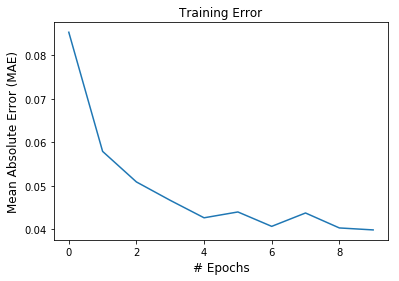

In [58]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(bt_history.epoch, bt_history.history['loss'])
ax1.set_title('Training Error')

if bt_model.loss == 'mae':
    ax1.set_ylabel('Mean Absolute Error (MAE)',fontsize=12)
# just in case you decided to change the model loss calculation
else:
    ax1.set_ylabel('Model Loss',fontsize=12)
ax1.set_xlabel('# Epochs',fontsize=12)
plt.show()

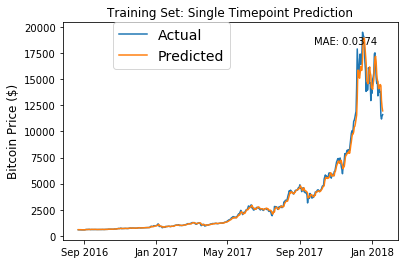

In [59]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,5,9]])
ax1.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,5,9]])
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         training_set['bt_Close'][window_len:], label='Actual')
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         ((np.transpose(bt_model.predict(LSTM_training_inputs))+1) * training_set['bt_Close'].values[:-window_len])[0], 
         label='Predicted')
ax1.set_title('Training Set: Single Timepoint Prediction')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.15, 1), loc=2, borderaxespad=0., prop={'size': 14})
ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(bt_model.predict(LSTM_training_inputs))+1)-\
            (training_set['bt_Close'].values[window_len:])/(training_set['bt_Close'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')
# figure inset code taken from http://akuederle.com/matplotlib-zoomed-up-inset
'''axins = zoomed_inset_axes(ax1, 3.35, loc=10) # zoom-factor: 3.35, location: centre
axins.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,5,9]])
axins.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         training_set['bt_Close'][window_len:], label='Actual')
axins.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         ((np.transpose(bt_model.predict(LSTM_training_inputs))+1) * training_set['bt_Close'].values[:-window_len])[0], 
         label='Predicted')
axins.set_xlim([datetime.date(2017, 3, 1), datetime.date(2017, 5, 1)])
axins.set_ylim([10,60])
#axins.set_xticklabels('')
#mark_inset(ax1, axins, loc1=1, loc2=3, fc="none", ec="0.5")
'''
plt.show()
fig.savefig('/Users/pz/Desktop/RNNpredictionLongRun.png')

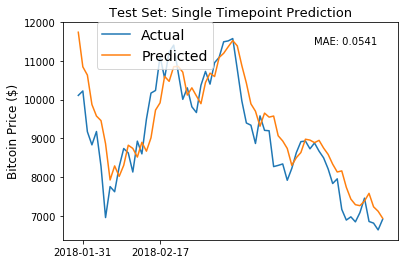

In [60]:
fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(2018, 1, 31), datetime.date(2018, 2, 17)])
ax1.set_xticklabels([datetime.date(2018, 1, 31), datetime.date(2018, 2, 17)])
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:].astype(datetime.datetime),
         test_set['bt_Close'][window_len:], label='Actual')
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:].astype(datetime.datetime),
         ((np.transpose(bt_model.predict(LSTM_test_inputs))+1) * test_set['bt_Close'].values[:-window_len])[0], 
         label='Predicted')
ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(bt_model.predict(LSTM_test_inputs))+1)-\
            (test_set['bt_Close'].values[window_len:])/(test_set['bt_Close'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.set_title('Test Set: Single Timepoint Prediction',fontsize=13)
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.show()
fig.savefig('/Users/pz/Desktop/RNNpredictionShortRun.png')

## AR Model

In [61]:
# random seed for reproducibility
np.random.seed(202)
# we'll try to predict the closing price for the next 5 days 
# change this value if you want to make longer/shorter prediction
pred_range = 10
# initialise model architecture
bt_model = build_model(LSTM_training_inputs, output_size=pred_range, neurons = 20)
# model output is next 5 prices normalised to 10th previous closing price
LSTM_training_outputs = []
for i in range(window_len, len(training_set['bt_Close'])-pred_range):
    LSTM_training_outputs.append((training_set['bt_Close'][i:i+pred_range].values/
                                  training_set['bt_Close'].values[i-window_len])-1)
LSTM_training_outputs = np.array(LSTM_training_outputs)
# train model on data
# note: eth_history contains information on the training error per epoch
bt_history = bt_model.fit(LSTM_training_inputs[:-pred_range], LSTM_training_outputs, 
                            epochs=5, batch_size=1, verbose=2, shuffle=True)

Epoch 1/5
 - 16s - loss: 0.1263
Epoch 2/5
 - 15s - loss: 0.1004
Epoch 3/5
 - 18s - loss: 0.0933
Epoch 4/5
 - 16s - loss: 0.0912
Epoch 5/5
 - 15s - loss: 0.0878


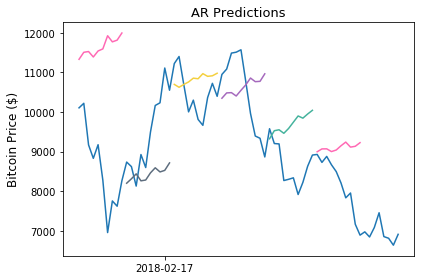

In [63]:
# little bit of reformatting the predictions to closing prices
bt_pred_prices = ((bt_model.predict(LSTM_test_inputs)[:-pred_range][::pred_range]+1)*\
                   test_set['bt_Close'].values[:-(window_len + pred_range)][::10].reshape(int(np.ceil((len(LSTM_test_inputs)-pred_range)/float(pred_range))),1))

pred_colors = ["#FF69B4", "#5D6D7E", "#F4D03F","#A569BD","#45B39D"]
fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(2018, 1, 1), datetime.date(2018, 2, 17)])
ax1.set_xticklabels([datetime.date(2018, 1, 1), datetime.date(2018, 2, 17)])
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:].astype(datetime.datetime),
         test_set['bt_Close'][window_len:], label='Actual')
for i, (bt_pred) in enumerate(bt_pred_prices):
    # Only adding lines to the legend once
    if i<10:
        ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:].astype(datetime.datetime)[i*pred_range:i*pred_range+pred_range],
                 bt_pred, color=pred_colors[i%5], label="Predicted")
    else: 
        ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:].astype(datetime.datetime)[i*pred_range:i*pred_range+pred_range],
                 bt_pred, color=pred_colors[i%5])
ax1.set_title('AR Predictions',fontsize=13)
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.set_xticklabels([datetime.date(2018, 1, 1), datetime.date(2018, 2, 17)])
#ax1.legend(bbox_to_anchor=(0.13, 1), loc=2, borderaxespad=0., prop={'size': 12})
fig.tight_layout()
plt.show()
fig.savefig("AR Predict.png")